# 1. Latar Belakang

Penyakit Lardiovaskular (Cardiovascular diseases) adalah penyebab kematian nomor 1 secara global, mengambil sekitar 17,9 juta jiwa setiap tahun, yang menyumbang 31% dari semua kematian di seluruh dunia. Gagal jantung adalah kejadian umum yang disebabkan oleh Penyakit Lardiovaskular dan kumpulan data ini berisi 12 fitur yang dapat digunakan untuk memprediksi kematian akibat gagal jantung.

Sebagian besar penyakit kardiovaskular dapat dicegah dengan mengatasi faktor risiko perilaku seperti penggunaan tembakau, diet tidak sehat dan obesitas, kurangnya aktivitas fisik, dan penggunaan alkohol yang berbahaya menggunakan strategi di seluruh populasi.Orang dengan penyakit kardiovaskular atau yang berada pada risiko kardiovaskular tinggi (karena adanya satu atau lebih faktor risiko seperti hipertensi, diabetes, hiperlipidemia, atau penyakit yang sudah ada) memerlukan deteksi dan manajemen dini di mana model pembelajaran mesin dapat sangat membantu. . 

## 1.1 Deskripsi Data

Dataset dari Davide Chicco, Giuseppe Jurman: 

**1. Age:** usia pasien (dalam tahun)

**2. Anemia:** Penurunan sel darah merah atau hemoglobin

**3. High blood pressure:** Jika pasien menderita hipertensi

**4. Creatinine phosphokinase:** Tingkat enzim CPK dalam darah (mcg/L)

**5. Diabetes:** Jika pasien menderita diabetes

**6. Ejection fraction:** Persentase darah yang meninggalkan jantung pada setiap kontraksi

**7. Sex:** Wanita atau pria

**8. Platelets:** Trombosit dalam darah (kiloplatelet/mL)

**9. Serum creatinine:** Tingkat kreatinin dalam darah (mg/dL)

**10. Serum sodium:** Tingkat natrium dalam darah (mEq/L)

**11. Smoking:** Jika pasien merokok

**12. Time::** Periode tindak lanjut (dalam hari)

**13. (target) death event:** Jika pasien meninggal selama masa tindak lanjut 

## 1.2 Deskripsi Masalah

- Membuat model untuk memprediksi kemungkinan pasien meninggal karena gagal jantung.
- Ini adalah masalah klasifikasi biner karena kelas target (Kematian) terdiri dari dua kelas Benar atau Salah 

# 2. Persiapan Data

## 2.1 Paket yang Dibutuhkan

In [3]:
!pip install seaborn --upgrade
import pandas as pd # data manipulation
import numpy as np # linear algebra

# data visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from statsmodels.graphics.gofplots import qqplot # normality check
import plotly.express as px
from sklearn.tree import plot_tree # decision tree 

# data preprocessing
from imblearn.over_sampling import SMOTE # deal with imbalance data
from sklearn.preprocessing import MinMaxScaler, PowerTransformer # scale data

# classifiers
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression # linear classification
from sklearn.svm import LinearSVC, SVC # support vector machines
from sklearn.tree import DecisionTreeClassifier # tree based
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier,\
AdaBoostClassifier, GradientBoostingClassifier
import xgboost as xgb

# model evaluation and selection
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import classification_report, plot_roc_curve
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, accuracy_score, roc_auc_score

import os
print(os.listdir("/content/input"))

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
[]


 ## 2.2 Dataset dan Deskripsi Fitur 

In [4]:
df = pd.read_csv('/content/input/heart_failure_clinical_records_dataset.csv')
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [5]:
df.shape   # dimensi data

(299, 13)

In [6]:
df.info()  # info struktur data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [7]:
df.age = df.age.astype('int64')  # Perbaiki tipe data usia 

In [8]:
# mempersiapkan data numerik dan kategori
numeric = ['age', 'creatinine_phosphokinase', 
           'ejection_fraction', 'platelets', 
           'serum_creatinine', 'time']
categorical = ['anaemia', 'diabetes', 'high_blood_pressure', 
               'sex', 'smoking']

Untuk penjelasan mengenai lebih lanjut mengenai fitur dataset silahkan kembali ke [Deskripsi Data](#des)

 ## 2.3 Missing Values

- Tidak ada nilai yang hilang 

In [9]:
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

## 2.4 Check Variabel Targets 

- Kelas atau label target tidak seimbang 

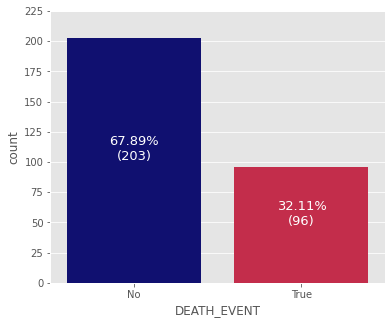

In [10]:
target_count = df.DEATH_EVENT.value_counts()
death_color = ['navy', 'crimson']
with plt.style.context('ggplot'):
    plt.figure(figsize=(6, 5))
    sns.countplot(data=df, x='DEATH_EVENT', palette=death_color)
    for name , val in zip(target_count.index, target_count.values):
        plt.text(name, val/2, f'{round(val/sum(target_count)*100, 2)}%\n({val})', ha='center',
                color='white', fontdict={'fontsize':13})
    plt.xticks(ticks=target_count.index, labels=['No', 'True'])
    plt.yticks(np.arange(0, 230, 25))
    plt.show()

## 2.5 Distribusi Fitur Numerik

- Dengan memperhatikan grafik histogram variabel numeriknya, diketahui bahwa fitur `creatinine_phosphokinase` dan `serum_creatinine` sangat positif atau miring ke kanan 

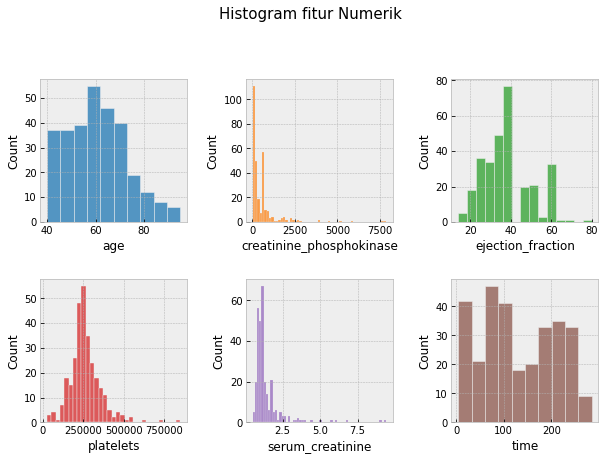

In [11]:
colors = sns.color_palette("tab10")
with plt.style.context('bmh'):
    plt.figure(figsize=(10, 10))
    plt.subplots_adjust(wspace=0.4, hspace=0.4)
    for i, (col, name) in enumerate(zip(colors, numeric)):
        plt.subplot(3, 3, i+1)
        sns.histplot(data=df, x=name, color=col)
    plt.suptitle('Histogram fitur Numerik', fontsize=15)

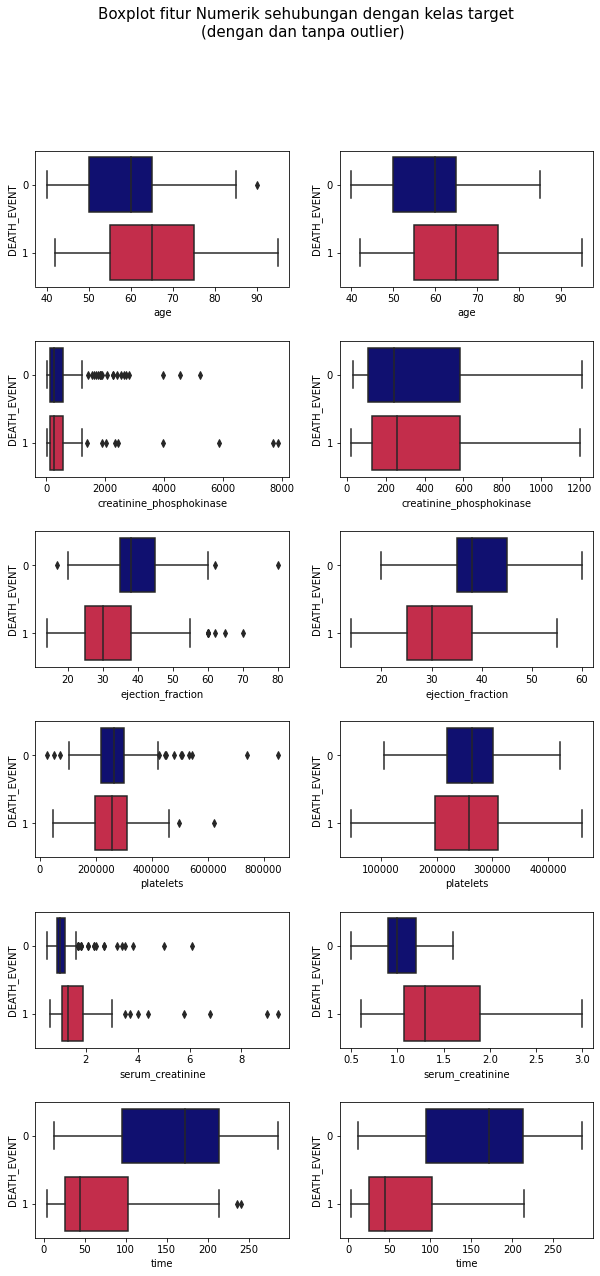

In [12]:
fig, axes = plt.subplots(6, 2, figsize=(10, 20))
plt.subplots_adjust(hspace=0.4)
axes = axes.ravel()
for i, name, col in zip(np.arange(0, 14, 2), numeric, colors):
    sns.boxplot(data=df, x=name, ax=axes[i], y='DEATH_EVENT', 
                orient='h', palette=death_color, showfliers=True)
    sns.boxplot(data=df, x=name, ax=axes[i+1], y='DEATH_EVENT', 
                orient='h', palette=death_color, showfliers=False)
plt.suptitle('Boxplot fitur Numerik sehubungan dengan kelas target\n(dengan dan tanpa outlier) ', 
             fontsize=15)
plt.show()

## 2.6 Fitur Kategoris Distribusi Dengan Kelas Target

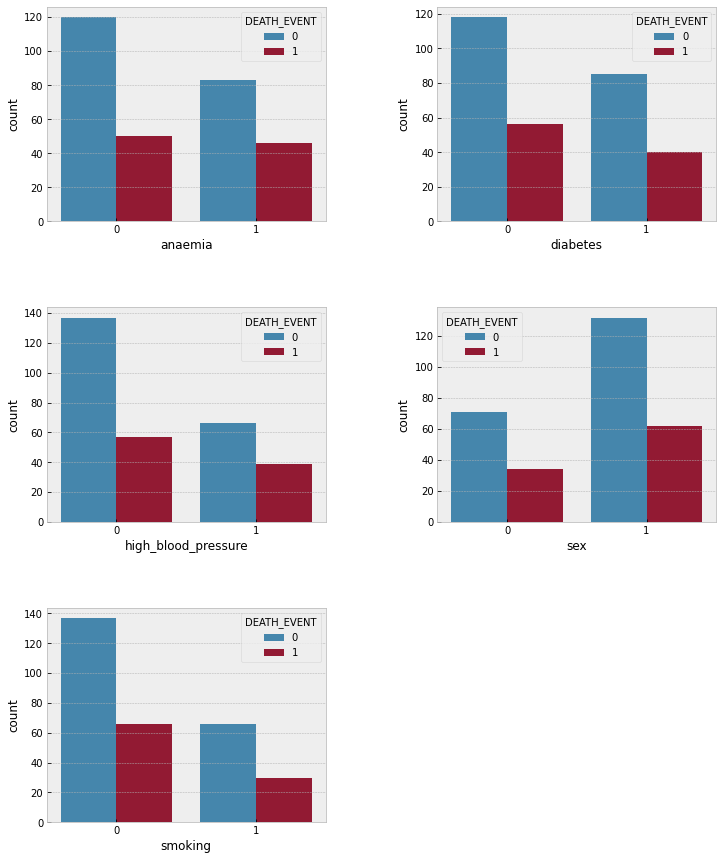

In [16]:
colors = sns.color_palette("tab10")
with plt.style.context('bmh'):
    plt.figure(figsize=(12, 15))
    plt.subplots_adjust(wspace=0.4, hspace=0.4)
    for i, (col, name) in enumerate(zip(colors, categorical)):
        plt.subplot(3, 2, i+1)
        sns.countplot(data=df, x=name, hue='DEATH_EVENT')

# 3. Manipulasi Data

## 3.1 Pisahkan Fitur dan Kelas Target  

In [15]:
X = df.iloc[:, :-1]
y = df['DEATH_EVENT']
print(X.shape)
print(y.shape)

(299, 12)
(299,)


## 3.2 Perbaiki Ketidakseimbangan Kelas menggunakan SMOTE

SMOTE adalah teknik oversampling di mana sampel sintetis dihasilkan untuk kelas minoritas, dalam kasus ini, 1's 

In [17]:
smote = SMOTE(random_state=2021, n_jobs=-1, k_neighbors=5)
smote.fit(X, y)
X_smote, y_smote = smote.fit_resample(X, y)
print(X_smote.shape)
print(y_smote.shape)

(406, 12)
(406,)


## 3.2 Transformasi Data

Selama EDA untuk fitur numerik, histogram dari beberapa fitur menunjukkan kemiringan. Beberapa fitur seperti `creatinine_phosphokinase` dan `serum_creatinine` sangat miring. Fitur miring seperti ini dapat dibuat lebih mirip Gaussian menggunakan transformasi daya atau transformasi log. Sebagai contoh:

**1. creatinine_phosphokinase** menggunakan transformasi log dapat membuat data sesuai dengan normalitas. Dalam hal ini, log-transform menghilangkan atau mengurangi skewness karena data asli mengikuti distribusi log-normal atau kira-kira begitu. 

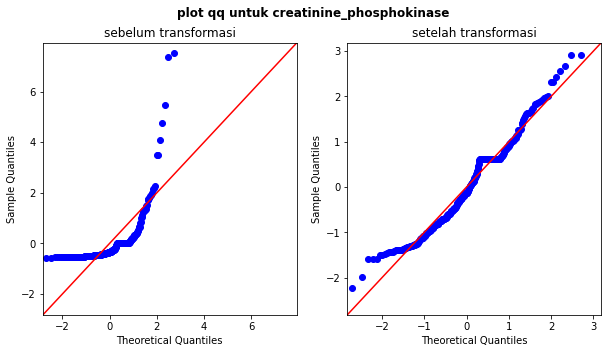

In [18]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
qqplot(df.creatinine_phosphokinase, fit=True, line='45', ax=ax[0])
ax[0].set_title('sebelum transformasi')
qqplot(np.log10(df.creatinine_phosphokinase), fit=True, line='45', ax=ax[1])
ax[1].set_title('setelah transformasi')
plt.suptitle('plot qq untuk creatinine_phosphokinase', fontweight='bold')
plt.show()

**Note:** Plot qq di atas menunjukkan pengaruh transformasi log pada kreatinin_fosfokinase. Plot QQ (atau plot kuantil-kuantil) adalah plot di mana sumbu sengaja diubah untuk membuat distribusi normal (atau Gaussian) muncul dalam garis lurus. Dengan kata lain, distribusi normal sempurna akan mengikuti garis dengan kemiringan = 1 dan intersep = 0. 

**2. serum_creatinine** menggunakan transformasi resiprokal (p = -1). Transformasi ini memiliki efek radikal karena membalikkan urutan di antara nilai-nilai dari tanda yang sama, oleh karena itu, nilai yang lebih besar menjadi lebih kecil, dan sebaliknya.

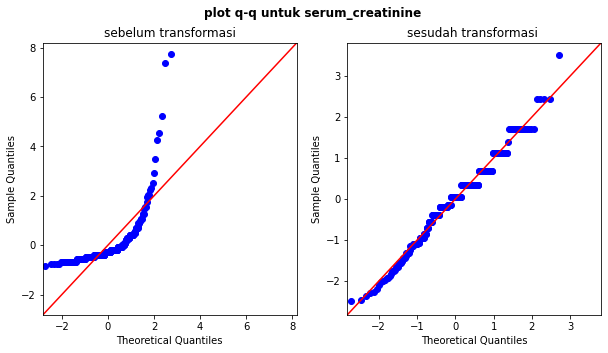

In [19]:
p = -1
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

qqplot(df.serum_creatinine, fit=True, line='45', ax=ax[0])
ax[0].set_title('sebelum transformasi')

qqplot(df.serum_creatinine**p, fit=True, line='45', ax=ax[1])
ax[1].set_title('sesudah transformasi ')

plt.suptitle('plot q-q untuk serum_creatinine', fontweight='bold')
plt.show()

Power Transformer dari paket sklearn-learn menyediakan dua metode untuk membuat distribusi seperti gaussian
- Boxcox
- Yeo-johnson

Kedua metode ini mencari nilai p yang tepat (seperti pada contoh di atas) agar distribusinya menjadi normal. Yeo-johnson adalah versi upgrade dari Boxcox karena berurusan dengan data dengan nilai negatif 

In [20]:
pt = PowerTransformer(method='yeo-johnson')
X_pt = pt.fit_transform(X_smote)
X_pt

array([[ 1.0270975 , -0.78583069,  0.66513694, ...,  0.80647784,
        -0.59062442, -2.09224159],
       [-0.58656988, -0.78583069,  2.55729366, ...,  0.80647784,
        -0.59062442, -1.97807977],
       [ 0.26608504, -0.78583069, -0.60636642, ...,  0.80647784,
         1.69312335, -1.9274372 ],
       ...,
       [ 0.10368013,  1.27253874,  0.53713399, ..., -1.23995968,
        -0.59062442, -1.23081612],
       [ 1.91177672,  1.27253874, -0.74622526, ...,  0.80647784,
        -0.59062442, -0.95808655],
       [-0.67793462,  1.27253874, -0.4004775 , ...,  0.80647784,
        -0.59062442, -1.67628156]])

## 3.3 Normalisasi Data

Terakhir, normalkan data menggunakan min-max scaler yang menskalakan data ke kisaran 0-1. Penskalaan diperlukan untuk ML juga seperti SVM, regresi logistik, knn yang sensitif terhadap penskalaan dan outlier (berlaku untuk masalah klasifikasi dan regresi). 

In [21]:
mm = MinMaxScaler()
X_scaled = mm.fit_transform(X_pt)

## 3.4  Distribusi Fitur Setelah Transformasi dan Penskalaan 

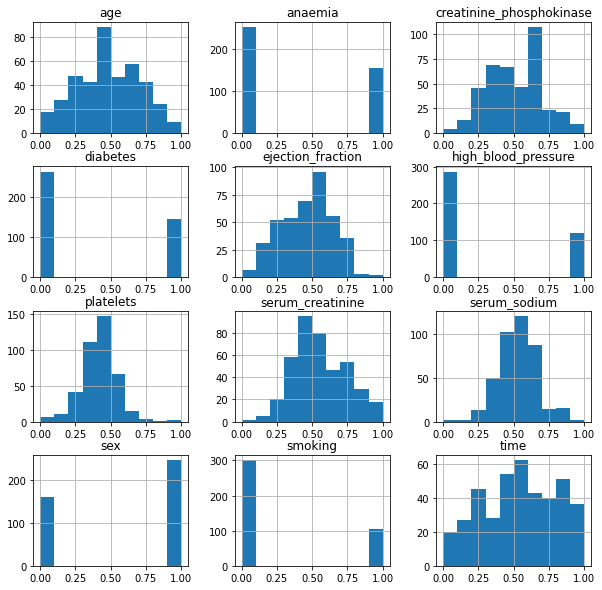

In [22]:
pd.DataFrame(X_scaled, columns=X.columns).hist(figsize=(10, 10))
plt.show()

## 3.5  Seleksi Fitur menggunakan Random Forest  

In [23]:
rf = RandomForestClassifier(n_estimators=100, max_depth=10, n_jobs=-1, 
                            class_weight='balanced', random_state=2021)
rf.fit(X_scaled, y_smote)

RandomForestClassifier(class_weight='balanced', max_depth=10, n_jobs=-1,
                       random_state=2021)

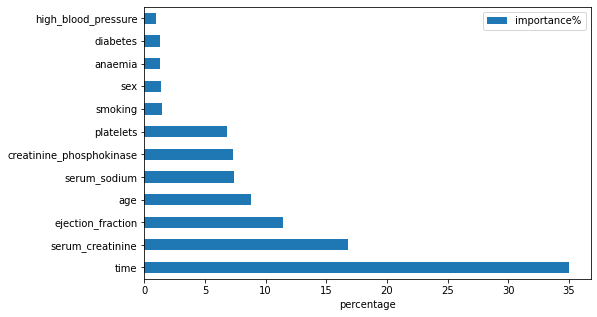

In [24]:
feature_imp = pd.DataFrame(np.round(rf.feature_importances_*100, 2), index=X.columns, columns=['importance%'])
feature_imp = feature_imp.sort_values(by='importance%', ascending=False)
feature_imp.plot(kind='barh', figsize=(8, 5))
plt.xlabel('percentage')
plt.show()

In [25]:
imp_features = feature_imp.index[:3]
imp_features

Index(['time', 'serum_creatinine', 'ejection_fraction'], dtype='object')

In [26]:
X_selected = pd.DataFrame(X_scaled, columns=X.columns)[imp_features]
X_selected

,time,serum_creatinine,ejection_fraction
0,0.000000,0.737676,0.165986
1,0.029502,0.489581,0.512213
2,0.042589,0.575762,0.165986
3,0.042589,0.737676,0.165986
4,0.054846,0.845279,0.165986
...,...,...,...
401,0.142785,0.527085,0.542704
402,0.142785,0.856704,0.319941
403,0.222609,0.436728,0.557539
404,0.293088,0.492972,0.641457


# 4. Pemodelan Data dan Hyperparameter

Oleh karena itu, tujuannya sekarang adalah untuk memisahkan kedua kelas seperti yang ditunjukkan pada gambar di bawah ini

**Catatan:** Semua pengklasifikasi telah disetel untuk memaksimalkan skor f1 alih-alih akurasi. Skor F1 adalah rata-rata harmonik dari recall dan presisi. Skor ini akan mendukung pengklasifikasi dengan presisi dan daya ingat yang sama. Saya bisa saja mencapai daya ingat atau presisi yang tinggi tetapi sayangnya, kita tidak dapat memilikinya dua arah karena meningkatkan presisi mengurangi daya ingat, dan sebaliknya. 

In [27]:
model_data = X_selected
model_data['target'] = y_smote
model_data

,time,serum_creatinine,ejection_fraction,target
0,0.000000,0.737676,0.165986,1
1,0.029502,0.489581,0.512213,1
2,0.042589,0.575762,0.165986,1
3,0.042589,0.737676,0.165986,1
4,0.054846,0.845279,0.165986,1
...,...,...,...,...
401,0.142785,0.527085,0.542704,1
402,0.142785,0.856704,0.319941,1
403,0.222609,0.436728,0.557539,1
404,0.293088,0.492972,0.641457,1


In [28]:
px.scatter_3d(model_data, x='time', y='serum_creatinine', z='ejection_fraction', color='target')

In [29]:
X_train, X_test, y_train, y_test = train_test_split(model_data.drop(['target'], axis=1), 
                                                    model_data['target'], 
                                                    test_size=0.20, 
                                                    random_state=2021, 
                                                    stratify=model_data['target']
                                                   )
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(324, 3)
(324,)
(82, 3)
(82,)


## 4.1 k-Nearest Neighbor Classifier

Mari kita mulai dengan pelajar yang sederhana dan malas di mana suatu objek diklasifikasikan berdasarkan suara pluralitas tetangganya. 

In [30]:
knn_clf = KNeighborsClassifier(n_jobs=-1)

# Penyetelan hiperparameter 

knn_params = {
    'n_neighbors': np.arange(2, 12)
}
knn_cv = GridSearchCV(knn_clf, knn_params, scoring='f1', n_jobs=-1, cv=10)
knn_cv.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(n_jobs=-1), n_jobs=-1,
             param_grid={'n_neighbors': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11])},
             scoring='f1')

### Nilai Optimal untuk Memaksimalkan Kinerja

Oleh karena itu, skor f1 tertinggi dicapai dengan knn menggunakan 6 tetangga. 

In [31]:
knn_cv.best_params_

{'n_neighbors': 6}

### Prediksi pada data pelatihan menggunakan prediksi lintas Val

cross_val_predict() melakukan validasi silang K-fold, tetapi alih-alih mengembalikan skor evaluasi, ia mengembalikan prediksi yang dibuat pada setiap lipatan tes (iterasi). Ini berarti Anda mendapatkan prediksi yang jelas untuk setiap instance dalam set pelatihan. 

In [32]:
knn_train_pred = cross_val_predict(knn_cv, X_train, y_train, cv=10, n_jobs=-1)
knn_train_pred

array([1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0,

### Laporan Klasifikasi data pelatihan 

In [33]:
print(classification_report(y_train, knn_train_pred, digits=4, target_names=['not gonna die', 'will die']))

               precision    recall  f1-score   support

not gonna die     0.8662    0.8395    0.8527       162
     will die     0.8443    0.8704    0.8571       162

     accuracy                         0.8549       324
    macro avg     0.8553    0.8549    0.8549       324
 weighted avg     0.8553    0.8549    0.8549       324



**Catatan:** Pendekatan serupa digunakan untuk semua pengklasifikasi di bawah ini.

## 4.2 Regresi Logistik

Regresi logistik menggunakan fungsi logit untuk menghitung probabilitas hasil, dalam kasus kami, kelas target `` 

In [34]:
lr_clf = LogisticRegression(class_weight='balanced', random_state=2021, n_jobs=-1)

In [35]:
# Penyetelan hyper-parameter menggunakan Pencarian Grid 
lr_params = {
    'penalty': ['l1', 'l2', 'elasticnet'], 
    'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000], 
    #'solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
}
lr_cv = GridSearchCV(lr_clf, lr_params, scoring='f1', cv=10, n_jobs=-1)
lr_cv.fit(X_train, y_train)

# Nilai parameter terbaik untuk mencapai skor F1 tertinggi 
lr_cv.best_params_

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning:


160 fits failed out of a total of 240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
80 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 449, in _check_solver
    % (solver, penalty)
ValueError: Sol

{'C': 1, 'penalty': 'l2'}

In [36]:
# Prediksi pada data pelatihan menggunakan prediksi nilai silang
lr_train_pred = cross_val_predict(lr_cv, X_train, y_train, cv=10, n_jobs=-1)

# Laporan klasifikasi
print(classification_report(y_train, lr_train_pred, digits=4, target_names=['not gonna die', 'will die']))

               precision    recall  f1-score   support

not gonna die     0.8373    0.8580    0.8476       162
     will die     0.8544    0.8333    0.8438       162

     accuracy                         0.8457       324
    macro avg     0.8459    0.8457    0.8457       324
 weighted avg     0.8459    0.8457    0.8457       324



## 4.3 Support Vector Machine (SVM)

### Klasifikasi SVM Linear (Hard Margin)
Seperti yang terlihat dari plot 3D data. Masalahnya sepertinya tidak dapat dipisahkan menggunakan hard margin svm karena ada beberapa kebisingan di kedua kelas. 

In [37]:
lin_svm_clf = SVC(kernel='linear', class_weight='balanced', random_state=2021)

params = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], # deicison boundries
}
lin_svm_cv = GridSearchCV(lin_svm_clf, params, scoring='f1', n_jobs=-1, cv=10)
lin_svm_cv.fit(X_train, y_train)

lin_svm_cv.best_params_

{'C': 1}

In [38]:
lin_svm_train_pred = cross_val_predict(lin_svm_cv, X_train, y_train, cv=10, n_jobs=-1)
print(classification_report(y_train, lin_svm_train_pred, digits=4, target_names=['not gonna die', 'will die']))

               precision    recall  f1-score   support

not gonna die     0.8476    0.8580    0.8528       162
     will die     0.8562    0.8457    0.8509       162

     accuracy                         0.8519       324
    macro avg     0.8519    0.8519    0.8518       324
 weighted avg     0.8519    0.8519    0.8518       324



### Klasifikasi Non-Linear (Soft Margin)

In [39]:
rbf_svm = SVC(kernel='rbf', class_weight='balanced')

params = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], # deicison boundries
}
rbf_svm_cv = GridSearchCV(rbf_svm, params, scoring='f1', n_jobs=-1, cv=10)
rbf_svm_cv.fit(X_train, y_train)

rbf_svm_cv.best_params_

{'C': 1}

In [40]:
rbf_svm_train_pred = cross_val_predict(rbf_svm_cv, X_train, y_train, cv=10, n_jobs=-1)
print(classification_report(y_train, rbf_svm_train_pred, digits=4, target_names=['not gonna die', 'will die']))

               precision    recall  f1-score   support

not gonna die     0.8645    0.8272    0.8454       162
     will die     0.8343    0.8704    0.8520       162

     accuracy                         0.8488       324
    macro avg     0.8494    0.8488    0.8487       324
 weighted avg     0.8494    0.8488    0.8487       324



## 4.4 Pohon Keputusan (Decision Tree) 

- Memerlukan sedikit persiapan data dan tidak memerlukan penskalaan atau pemusatan fitur.
- Sederhana untuk dipahami dan diinterpretasikan.
- Pohon Keputusan seringkali memiliki keputusan ortogonal (semua pemisahan tegak lurus terhadap sumbu), yang membuatnya sensitif terhadap rotasi set pelatihan. Sangat mungkin bahwa model tidak akan menggeneralisasi dengan baik. Salah satu cara untuk membatasi masalah ini adalah dengan menggunakan Analisis Komponen Utama yang seringkali menghasilkan orientasi yang lebih baik dari data pelatihan.
- Masalah utama dengan Pohon Keputusan adalah bahwa mereka sangat sensitif terhadap variasi kecil dalam data pelatihan. 
- Random Forests dapat membatasi ketidakstabilan ini dengan membuat prediksi rata-rata pada banyak pohon. 

In [46]:
dt_clf = DecisionTreeClassifier(class_weight='balanced', random_state=2021)

params = {
    'criterion': ['gini', 'entropy'], 
    'max_depth': np.arange(2, 22, 2), # depth of tree
    'min_samples_split': [2, 3, 4], # min. no. of samples a node must have before it splits 
    'min_samples_leaf': [1, 2, 3, 4] # min. non of samples a leaf node must have
}
dt_cv = GridSearchCV(dt_clf, params, scoring='f1', n_jobs=-1, cv=10)
dt_cv.fit(X_train, y_train)

dt_cv.best_params_

{'criterion': 'gini',
 'max_depth': 6,
 'min_samples_leaf': 2,
 'min_samples_split': 2}

In [47]:
dt_train_pred = cross_val_predict(dt_cv, X_train, y_train, cv=10, n_jobs=-1)

best_dt_clf = DecisionTreeClassifier(class_weight='balanced', random_state=2021, 
                                    max_depth=4, criterion='entropy', min_samples_split=2, 
                                     min_samples_leaf= 1)

best_dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=4, random_state=2021)

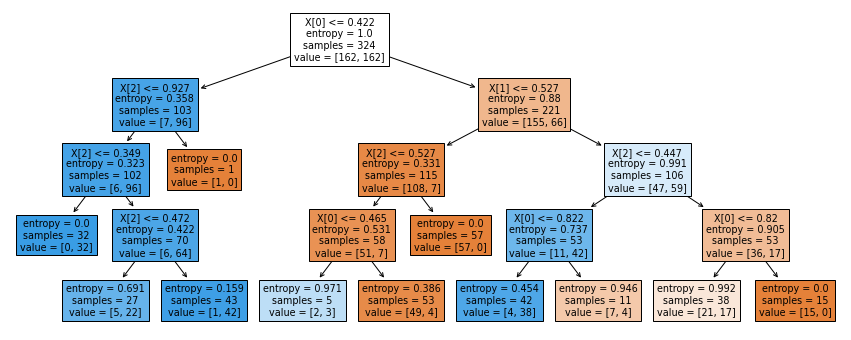

In [48]:
plt.figure(figsize=(15, 6))
plot_tree(best_dt_clf, filled=True, 
          #feature_names=['time', 'serum_creatinine', 'ejection_fraction']
         )
plt.show()

## 4.5 Random Forests

- Ini adalah ansambel (kelompok prediktor) dari pohon keputusan.
- Ia memiliki semua hyperparameters dari pohon keputusan 

In [43]:
rf = RandomForestClassifier(n_jobs=-1, random_state=2021, class_weight='balanced')

params = {
    #'n_estimators': [100, 200, 300], 
    'max_depth': np.arange(2, 22, 1), 
    #'min_samples_split': [2, 3, 4], 
    #'min_samples_leaf': [1, 2, 3, 4], 
    'criterion': ['gini', 'entropy']
}
rf_cv = RandomizedSearchCV(rf, params, scoring='f1', n_jobs=-1, cv=10, random_state=2021, n_iter=20)
rf_cv.fit(X_train, y_train)

rf_cv.best_params_rf_train_pred = cross_val_predict(rf_cv, X_train, y_train, cv=10, n_jobs=-1, verbose=1)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  4.5min finished


In [44]:
rf_train_pred = cross_val_predict(rf_cv, X_train, y_train, cv=10, n_jobs=-1, verbose=1)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  4.4min finished


In [45]:
print(classification_report(y_train, rf_train_pred, digits=4, target_names=['not gonna die', 'will die']))

               precision    recall  f1-score   support

not gonna die     0.8889    0.8889    0.8889       162
     will die     0.8889    0.8889    0.8889       162

     accuracy                         0.8889       324
    macro avg     0.8889    0.8889    0.8889       324
 weighted avg     0.8889    0.8889    0.8889       324



# 5. Evaluasi Model

Random Forest telah mengungguli semua pengklasifikasi lainnya dalam akurasi, presisi, daya ingat, skor f1, dan skor AUC. 

In [42]:
models = ['kNN', 'Logistic Regression', 'Linear SVM', 'Non-Linear SVM', 
          'Decision Tree', 'Random Forest']
model_colors = sns.color_palette("Dark2")
accuracy = []
recall = []
precision = []
f1 = []
auc = []
predictions = [knn_train_pred, lr_train_pred, lin_svm_train_pred, 
               rbf_svm_train_pred, dt_train_pred, rf_train_pred]

for model_pred in predictions:
    accuracy.append(accuracy_score(y_train, model_pred))
    precision.append(precision_score(y_train, model_pred))
    recall.append(recall_score(y_train, model_pred))
    f1.append(f1_score(y_train, model_pred))
    auc.append(roc_auc_score(y_train, model_pred))

NameError: ignored

In [ ]:
with plt.style.context('ggplot'):
    plt.figure(figsize=(10, 5))
    plt.bar(models, accuracy, color=model_colors)
    for m, a in zip(models, accuracy):
        plt.text(m, a+0.01 , f'{round(a*100, 3)}%', ha='center')
    plt.xlabel('Models')
    plt.ylabel('Accuracy percentage (%)')
    plt.title('Model comparison on training data using Accuracy')
    plt.show()

In [ ]:
with plt.style.context('ggplot'):
    plt.figure(figsize=(10, 5))
    plt.bar(models, recall, color=model_colors)
    for m, a in zip(models, recall):
        plt.text(m, a+0.01 , f'{round(a*100, 3)}%', ha='center')
    plt.xlabel('Models')
    plt.ylabel('Recall percentage (%)')
    plt.title('Model comparison on training data using Recall')
    plt.show()

In [ ]:
with plt.style.context('ggplot'):
    plt.figure(figsize=(10, 5))
    plt.bar(models, precision, color=model_colors)
    for m, a in zip(models, precision):
        plt.text(m, a+0.01 , f'{round(a*100, 3)}%', ha='center')
    plt.xlabel('Models')
    plt.ylabel('Precision percentage (%)')
    plt.title('Model comparison on training data using Precision')
    plt.show()

In [ ]:
with plt.style.context('ggplot'):
    plt.figure(figsize=(10, 5))
    plt.bar(models, f1, color=model_colors)
    for m, a in zip(models, f1):
        plt.text(m, a+0.01 , f'{round(a*100, 3)}%', ha='center')
    plt.xlabel('Models')
    plt.ylabel('F1 percentage (%)')
    plt.title('Model comparison on training data using F1 score')
    plt.show()

In [ ]:
with plt.style.context('ggplot'):
    plt.figure(figsize=(10, 5))
    plt.bar(models, auc, color=model_colors)
    for m, a in zip(models, auc):
        plt.text(m, a+0.01 , round(a, 3), ha='center')
    plt.xlabel('Models')
    plt.ylabel('AUC')
    plt.title('Model comparison on training data using AUC')
    plt.show()

# 6. Prediksi pada Data Uji

In [ ]:
best_models = [knn_cv, lr_cv, lin_svm_cv, rbf_svm_cv, dt_cv, rf_cv]
for name, model in zip(models, best_models):
    best_predictions = model.predict(X_test)
    print(name.upper())
    print(classification_report(y_test, best_predictions))
    print("-------------------------------------------------------------")

## Perbandingan model pada data uji menggunakan Kurva ROC

- kurva ROC, memplot tingkat positif sejati (nama lain untuk penarikan) terhadap tingkat positif palsu (FPR).
- Sekali lagi ada trade-off: semakin tinggi recall (TPR), semakin banyak false positive (FPR) yang dihasilkan classifier. Garis putus-putus mewakili kurva ROC dari pengklasifikasi acak murni; pengklasifikasi yang baik tetap sejauh mungkin dari garis itu
- Salah satu cara untuk membandingkan pengklasifikasi adalah dengan mengukur area di bawah kurva (AUC). Pengklasifikasi sempurna akan memiliki ROC AUC sama dengan 1, sedangkan pengklasifikasi acak murni akan memiliki ROC AUC sama dengan 0,5.
- Hutan acak memiliki AUC tertinggi. 

In [ ]:
best_models = [knn_cv, lr_cv, lin_svm_cv, rbf_svm_cv, dt_cv, rf_cv]
with plt.style.context('ggplot'):
    plt.figure(figsize=(10, 5))
    for name, model in zip(models, best_models):
        best_predictions = model.predict(X_test)
        fpr, tpr, thresholds = roc_curve(y_test, best_predictions)
        plt.plot(fpr, tpr, linewidth=2, label=name)
        plt.plot([0, 1], [0, 1], 'k--') 
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate (Reccll)')
    plt.legend()
    plt.show()

# Kesimpulan

Model yang terbaik untuk melakukan klasifikasi untuk dataset ini adalah KNN.

